In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

import os
import sys
import importlib

sys.path.insert(0, "..")

import draughts
import board
import preprocessing
import engine

importlib.reload(draughts);
importlib.reload(board);
importlib.reload(preprocessing);
importlib.reload(engine);

In [2]:
import draughts

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

tf.config.run_functions_eagerly(True)

In [4]:
# def get_conv_net():
#     model = keras.models.Sequential()
#     model.add(layers.Conv2D(32, (2, 2), activation="relu", input_shape=(8, 8, 5)))
#     # model.add(layers.BatchNormalization())
#     model.add(layers.MaxPool2D())
#     model.add(layers.Conv2D(64, (2, 2), activation="relu"))
#     # model.add(layers.BatchNormalization())
#     model.add(layers.MaxPool2D())
#     model.add(layers.Flatten())
#     model.add(layers.Dense(128, activation="relu"))
#     model.add(layers.Dropout(0.3))
#     model.add(layers.Dense(128, activation="sigmoid"))

#     model.compile(optimizer="adam", 
#                   loss=keras.losses.MeanSquaredError(), 
#                   metrics=["accuracy"])
    
#     return model

def get_conv_net():
    model = keras.models.Sequential()
    model.add(layers.Conv2D(128, (2, 2), activation="relu", input_shape=(8, 8, 5)))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
    model.add(layers.Conv2D(128, (2, 2), activation="relu"))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D())
#     model.add(layers.Conv2D(128, (2, 2), activation="relu"))
    # model.add(layers.BatchNormalization())
#     model.add(layers.MaxPool2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation="sigmoid"))

    model.compile(optimizer="adam", 
                  loss=keras.losses.MeanSquaredError(), 
                  metrics=["accuracy"])
    
    return model

In [68]:
white_model = get_conv_net()
black_model = get_conv_net()

In [69]:
white_model.load_weights("new_w_weights.h5")
black_model.load_weights("new_b_weights.h5")

In [70]:
def get_network_move(output):
    from_index = output[:64].argmax()
    to_index = output[64:].argmax()
    return engine.Move.from_indices(from_index, to_index)

num_dict = {l : i+1 for i, l in enumerate("abcdefgh")}

def cell_dist(cell1, cell2):
    p1 = np.array([num_dict[cell1[0]], int(cell1[1])])
    p2 = np.array([num_dict[cell2[0]], int(cell2[1])])
    return np.linalg.norm(p1 - p2)


def find_closest_move(move, valid_moves):
    distance = np.inf
    best_moves = []
    for m in valid_moves:
        dist = cell_dist(move.from_pos, m.from_pos)
        if dist < distance:
            best_moves.append(m)
            distance = dist
            
    closest_move = None
    distance = np.inf
            
    for m in best_moves:
        dist = cell_dist(move.to_pos, m.to_pos)
        if dist < distance:
            closest_move = m
            distance = dist
            
    return closest_move

In [75]:
new_board = draughts.Board()

def play(move):
#     new_board.push(move)
    output_vec = black_model.predict(np.array([preprocessing.board_layout_to_network_input(new_board.engine.layout)]))
#     print(output_vec)
    net_move = get_network_move(output_vec[0])
    closest_move = find_closest_move(net_move, new_board.valid_moves())
    print("Network move", net_move)
    print(closest_move)
    new_board.push_move(closest_move)
    display(new_board.show())

Network move Move( c3d4 )
Move( c3d4 )


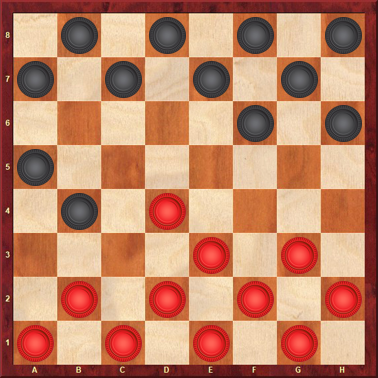

In [78]:
new_board.push("d6b4")
play("")

In [55]:
new_board.valid_moves()

(Move( a5c7 ),)